In [215]:
# TIME SERIES FORECASTING:

## Crime events in Miami Dade County, 
## The Police Chief of Miami Dade wants to predict how many Crimes should he expect next year to accordingly adjust 
## the Police presence on such important city.
## Based on the data of the previous years (months/days), we will use time series forecasting to get an approximate events of crimes. 
## Forecasted value of Crimes will help the Police Chief to can plan things accordingly to can provide a safety county for the tourists and residents.

## Time series analysis is a specialized branch of statistics used extensively in fields such as Econometrics & Operation Research.

In [276]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from math import sqrt

from datetime import datetime

from statsmodels.tsa.api import ExponentialSmoothing

from sklearn.metrics import mean_squared_error



In [277]:
# # Problem Statement and Dataset:

# We are provided a Time Series problem involving prediction of number of Crimes in Miami Dade County, 
# We are provided with 2 years of data(Aug 2012-Sept 2014) 
# and using this data we have to forecast the number of commuters for next 7 months.

In [278]:
# Read the CLEAN data From 2015-05 to 2019-06 csv file into a pandas DataFrame

# Data base with the 3 past months
# df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv',parse_dates =["Booking_year_month"])
# df.head()

# Data base past month
df = pd.read_csv('Resources/data3_test.csv',parse_dates =["Booking_year_month"])
df.head()

,Unnamed: 0,Booking_year_month,DOB_month,total_crime,age<25_1,age26-50_1,age>50_1,day_of_week_Monday_1,day_of_week_Tuesday_1,day_of_week_Wednesday_1,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08-01,1013,142,18,92,32,14,13,29,...,23,21,14,142,0,0,0,13,52,77
1,4,2015-09-01,803,153,15,112,26,24,17,20,...,18,22,32,153,0,0,0,14,43,96
2,5,2015-10-01,1057,121,11,84,26,13,22,23,...,13,10,16,121,0,0,0,11,44,66
3,6,2015-11-01,774,156,16,92,48,13,16,21,...,18,26,23,0,0,0,156,10,46,100
4,7,2015-12-01,891,114,4,81,29,18,18,25,...,13,17,8,0,0,0,114,5,42,67


In [279]:
#df.dtypes

In [280]:
# Drop innecesary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['total_crime']= df['total_crime'].astype(float)

In [281]:
#df['total_crime'].dtype

In [282]:
# Our Database has 50 months from 2015-05 to 2019-06.
# we will split the data for the Train database and the Test database:
# train is from 2015-08 to 2018-12 -> represent the 87% of our data

train=df[0:41]

# test is from 2019-01 to 2019-06

test=df[41:] 

In [283]:
train.head()

,Booking_year_month,DOB_month,total_crime,age<25_1,age26-50_1,age>50_1,day_of_week_Monday_1,day_of_week_Tuesday_1,day_of_week_Wednesday_1,day_of_week_Thursday_1,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,2015-08-01,1013,142.0,18,92,32,14,13,29,28,23,21,14,142,0,0,0,13,52,77
1,2015-09-01,803,153.0,15,112,26,24,17,20,20,18,22,32,153,0,0,0,14,43,96
2,2015-10-01,1057,121.0,11,84,26,13,22,23,24,13,10,16,121,0,0,0,11,44,66
3,2015-11-01,774,156.0,16,92,48,13,16,21,39,18,26,23,0,0,0,156,10,46,100
4,2015-12-01,891,114.0,4,81,29,18,18,25,15,13,17,8,0,0,0,114,5,42,67


In [284]:
#train.tail()

In [285]:
test.head()

,Booking_year_month,DOB_month,total_crime,age<25_1,age26-50_1,age>50_1,day_of_week_Monday_1,day_of_week_Tuesday_1,day_of_week_Wednesday_1,day_of_week_Thursday_1,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
41,2019-01-01,982,121.0,23,80,18,13,13,21,17,13,26,18,0,0,0,121,8,46,67
42,2019-02-01,934,155.0,23,100,32,23,20,24,35,24,18,11,0,0,155,0,10,54,91
43,2019-03-01,932,145.0,22,92,31,14,18,38,31,16,10,18,0,0,145,0,10,40,95
44,2019-04-01,880,139.0,26,84,29,15,13,26,24,32,10,19,0,0,139,0,9,38,92
45,2019-05-01,1007,131.0,26,74,31,27,21,24,18,13,14,14,0,131,0,0,13,23,95


In [286]:
#test.tail()

In [287]:
# Drop innecesary columns
test = test[["Booking_year_month", "total_crime"]]
test.head()

,Booking_year_month,total_crime
41,2019-01-01,121.0
42,2019-02-01,155.0
43,2019-03-01,145.0
44,2019-04-01,139.0
45,2019-05-01,131.0


In [288]:
train.to_csv("Resources/train.csv",index=True,header=True)
test.to_csv("Resources/test.csv",index=True,header=True)

In [289]:
#train.dtypes

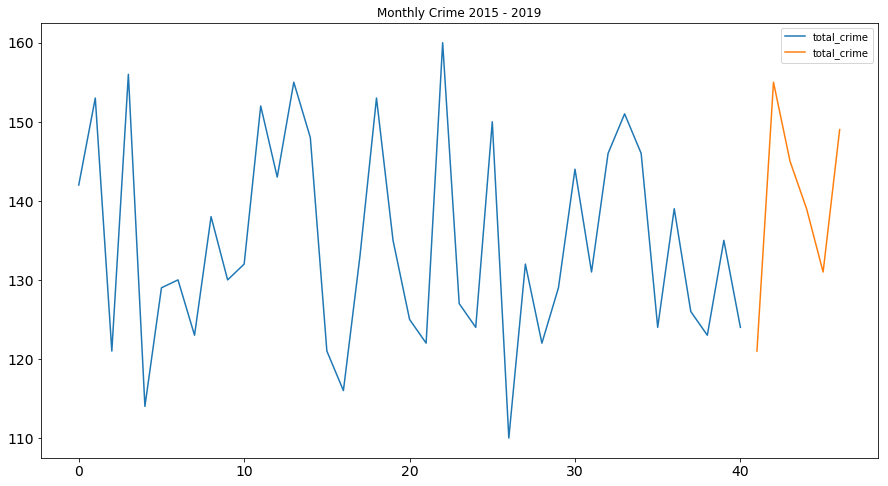

In [290]:
#Plotting data 
#verificar si se puede hacer con este csv modificado o si se debe hacer este primer plot con la data original)
train.total_crime.plot(figsize=(15,8), title= 'Monthly Crime 2015 - 2019', fontsize=14)
test.total_crime.plot(figsize=(15,8), title= 'Monthly Crime 2015 - 2019', fontsize=14)
plt.legend(loc='best')
#plt.show()

In [291]:
# Naive Forecast

# Is a Forecasting technique which assumes that the next expected point is equal to the last observed.

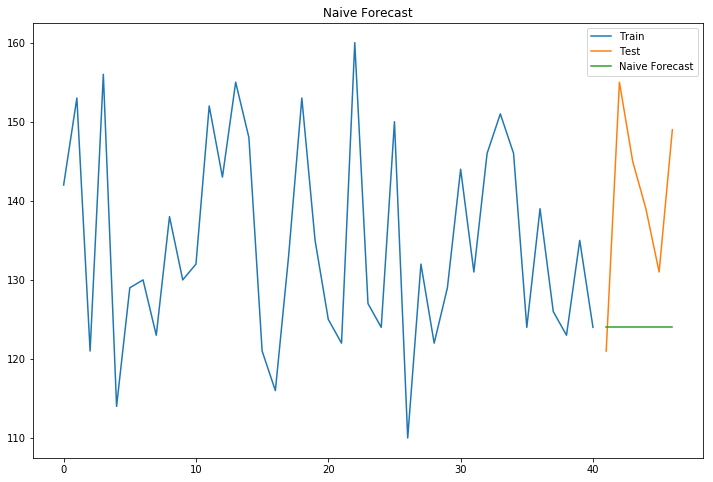

In [293]:
dd= np.asarray(train.total_crime)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['total_crime'], label='Train')
plt.plot(test.index,test['total_crime'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [294]:
# calculate RMSE to check to accuracy of our model on test data set.
# libraries implemented : from sklearn.metrics import mean_squared_error
#                        from math import sqrt


rms = sqrt(mean_squared_error(test.total_crime, y_hat.naive))
print(rms)

19.621416870348583


In [295]:
## Simple Average

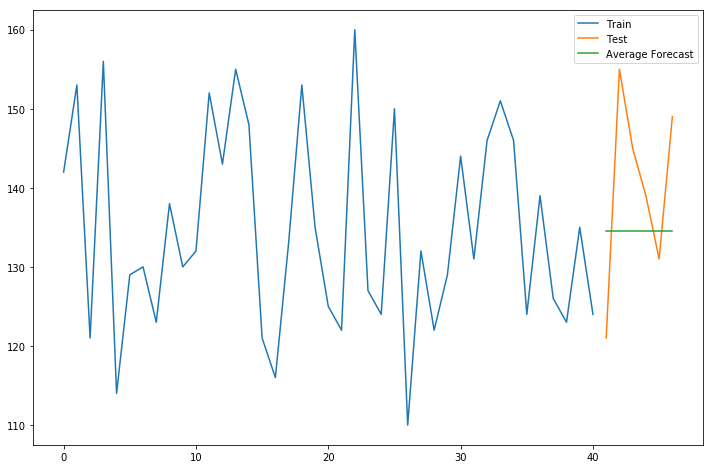

In [296]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['total_crime'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['total_crime'], label='Train')
plt.plot(test['total_crime'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [297]:
# calculate RMSE to check to accuracy of our model on test data set.
rms = sqrt(mean_squared_error(test.total_crime, y_hat_avg.avg_forecast))
print(rms)

12.624749306915472


In [298]:
## Moving Average

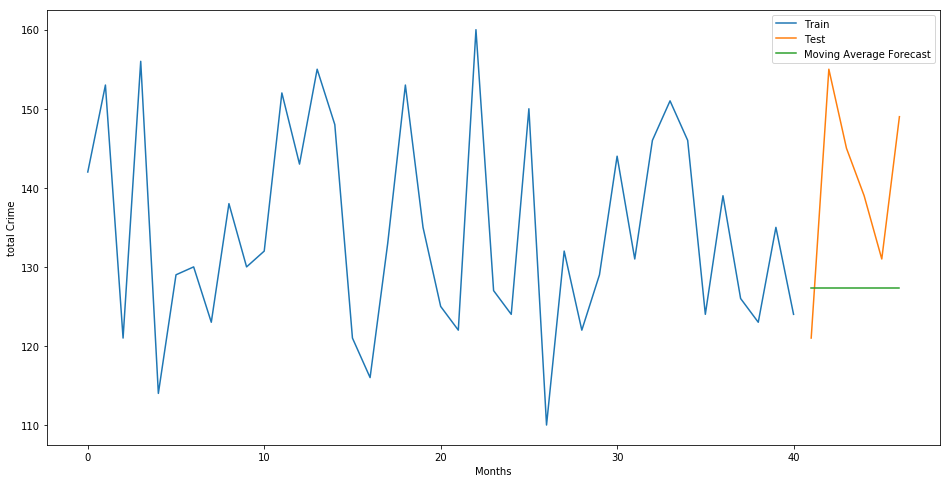

In [299]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['total_crime'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['total_crime'], label='Train')
plt.plot(test['total_crime'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.xlabel("Months")
plt.ylabel("total Crime")
plt.legend(loc='best')
plt.show()

In [300]:
rms = sqrt(mean_squared_error(test.total_crime, y_hat_avg.moving_avg_forecast))
print(rms)

17.013066873566462


In [301]:
## Simple Exponential Smoothing

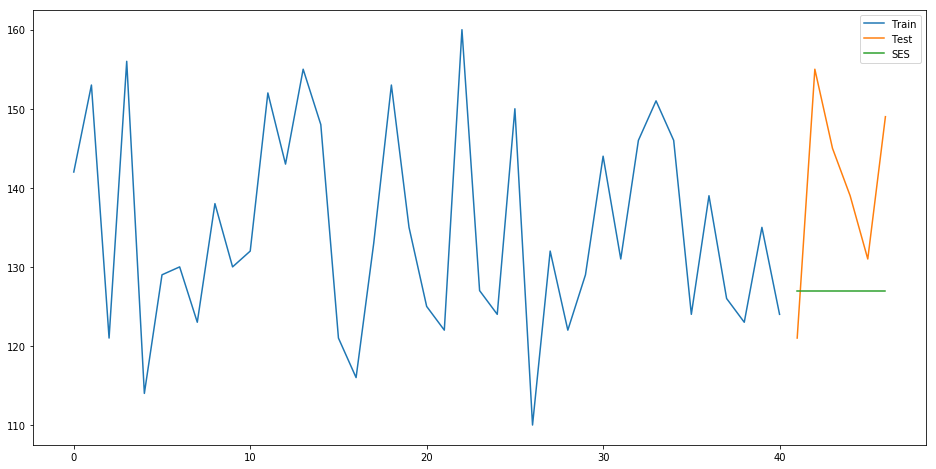

In [302]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['total_crime'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['total_crime'], label='Train')
plt.plot(test['total_crime'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [303]:
rms = sqrt(mean_squared_error(test.total_crime, y_hat_avg.SES))
print(rms)

17.305677373139268


In [304]:
## Holt-Winters Method

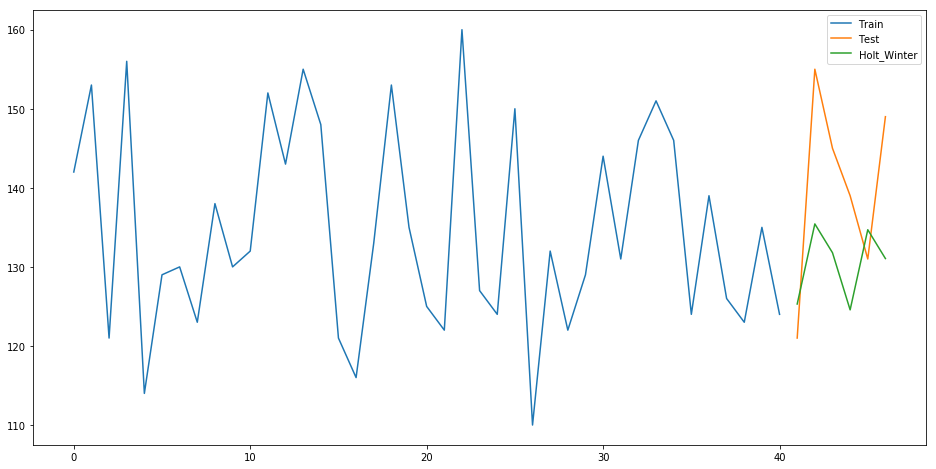

In [334]:
y_hat_avg = test.copy()
#3, 6
fit1 = ExponentialSmoothing(np.asarray(train['total_crime']) ,seasonal_periods=3 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['total_crime'], label='Train')
plt.plot(test['total_crime'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [329]:
rms = sqrt(mean_squared_error(test.total_crime, y_hat_avg.Holt_Winter))
print(rms)

15.481900401379148


In [335]:
## ARIMA
from statsmodels.tsa.statespace import sarimax

In [336]:
# y_hat_avg = test.copy()
# fit1 = sm.tsa.statespace.SARIMAX(train.total_crime, order=(2, 1, 4),seasonal_order=(0,1,1,8)).fit()
# y_hat_avg['SARIMA'] = fit1.predict(start="2015-08-01", end="2018-12-01", dynamic=True)
# plt.figure(figsize=(16,8))
# plt.plot( train['total_crime'], label='Train')
# plt.plot(test['total_crime'], label='Test')
# plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
# plt.legend(loc='best')
# plt.show()